<div style="padding:20px;color:black;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:#aaf0f0;overflow:hidden;font-weight:700;border: 5px solid #21a3a3;">  🧸PlayStore Data Analysis📈</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Create a scatter plot to visualize the relationship between revenue and the number 
of installs for paid apps only. Add a trendline to show the correlation and color-code
the points based on app categories. 

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.pipeline import Pipeline, FunctionTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from collections import Counter
import re
from PIL import Image
from tabulate import tabulate
from plotly.subplots import make_subplots
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [2]:
# Load data separately
playstore_data = pd.read_csv('../Data Set/Play Store Data.csv')
review_data = pd.read_csv('../Data Set/User Reviews.csv')

In [3]:
playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Identify the number of null values in each column of Play Store dataset
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Define preprocessing functions:</font></h4>
</div>

In [6]:
def filter_paid_apps(df):
    return df[df['Type'] == 'Paid'].copy()

In [7]:
def clean_price(df):
    df['Price'] = df['Price'].str.replace('$', '').astype(float)
    return df

In [8]:
def clean_installs(df):
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
    return df

In [9]:
def calculate_revenue(df):
    df['Revenue'] = df['Installs'] * df['Price']
    return df

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Create Preprocessing Pipeline:</font></h4>
</div>

In [10]:
# Create preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('filter_paid_apps', FunctionTransformer(filter_paid_apps)),
    ('clean_price', FunctionTransformer(clean_price)),
    ('clean_installs', FunctionTransformer(clean_installs)),
    ('calculate_revenue', FunctionTransformer(calculate_revenue))
])

In [11]:
# Apply the pipeline to playstore_data
paid_apps = preprocessing_pipeline.transform(playstore_data)

In [12]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 234 to 10798
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    object 
 4   Size            800 non-null    object 
 5   Installs        800 non-null    int64  
 6   Type            800 non-null    object 
 7   Price           800 non-null    float64
 8   Content Rating  800 non-null    object 
 9   Genres          800 non-null    object 
 10  Last Updated    800 non-null    object 
 11  Current Ver     798 non-null    object 
 12  Android Ver     799 non-null    object 
 13  Revenue         800 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 93.8+ KB


In [13]:
# Check skewness for 'Installs' and 'Revenue'

skew_installs = paid_apps['Installs'].skew ()
skew_revenue = paid_apps['Revenue'].skew ()

print(f"Skewness of Installs: {skew_installs}")
print(f"Skewness of Revenue: {skew_revenue}")

Skewness of Installs: 14.446690263938764
Skewness of Revenue: 15.678274846015881


In [14]:
# Appply logarithimic transformation to reduce skewness

paid_apps['Log_Installs'] = np.log1p (paid_apps['Installs']) # log1p is to handle zero and near-zero values.
paid_apps['Log_Revenue'] = np.log1p (paid_apps['Revenue'])

# Check the skewness again after transformation

skew_log_installs = paid_apps['Log_Installs'].skew ()
skew_log_revenue = paid_apps['Log_Revenue'].skew ()

print(f"Skewness of log_installs: {skew_log_installs}")
print(f"Skewness of log_revenue: {skew_log_revenue}")

Skewness of log_installs: -0.10873177479945148
Skewness of log_revenue: -0.1912368649997245


In [15]:
import statsmodels.api as sm
import plotly.express as px

fig1 = px.scatter(
    paid_apps,     # DataFrame containing only paid apps
    x='Log_Installs', # X-axis: Log-transformed number of installs
    y='Log_Revenue',  # Y-axis: Log-transformed revenue
    color='Category', # Color-code points based on app category
    title='Relationship between Revenue and Number of Installs for Paid Apps', # plot title
    hover_data=['App', 'Price'], # Additional information displayed on hover
    color_discrete_sequence=px.colors.qualitative.Set2, # Custom color palette
    opacity=0.7  # Make overlapping points more visible
)


#-- Manually Compute the Trendline using Ordinary Least Squares (OLS) Regression

# Define independent variable (Log_Installs) and add a constant for regression
X = sm.add_constant(paid_apps['Log_Installs']) 
y = paid_apps['Log_Revenue'] # Define dependent variable (Log_Revenue)

model = sm.OLS(y, X).fit() # Fit an OLS regression model
paid_apps['Trend'] = model.predict(X)  # Predict trendline values using the fitted model


#-- Add single trendline to scatter plot
fig1.add_traces(px.line(
    paid_apps.sort_values(by='Log_Installs'), # Sort by X-axis for smooth trendline
    x='Log_Installs',
    y='Trend'
).data)


#-- Customize plot layout for better appearance
fig1.update_layout(
    width=1100,  # Set the width of the plot
    height=600, # Set the height of the plot
    font_color='grey',      # Set default text color to white
    title_font={'size': 25, 'family': 'Arial', 'color': 'DarkSlateGray'}, # Customize title style
    title_x=0.5,  # Center-align the title
    xaxis=dict(title_font={'size': 12, 'color': 'white'}, showgrid=True, gridcolor='gray', gridwidth=0.2), # Add light gray gridlines
    yaxis=dict(title_font={'size': 12, 'color': 'white'}, showgrid=True, gridcolor='gray', gridwidth=0.2), # Add light gray gridlines
    xaxis_title='Number of Installs',
    yaxis_title='Revenue (USD)'
)

#-- Customize Scatter Points Appearance
fig1.update_traces(marker=dict(size=12, line=dict(width=1, color='DarkSlateGray'))) # Set the size of scatter points & Add border around points

# Show the plot
fig1.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/task_01.png" alt="Description">

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Justification</font></h4>
</div>

In [16]:
all_categories = playstore_data['Category'].unique()

categories_with_paid_apps = paid_apps['Category'].unique()

# Calculate the number of categories with and without paid apps
num_categories_with_paid_apps = len(categories_with_paid_apps)
num_categories_without_paid_apps = len(all_categories) - num_categories_with_paid_apps

# Creating a summary table
summary_table = pd.DataFrame({
    'Description': ['Categories with Paid Apps', 'Categories without Paid Apps'],
    'Count': [num_categories_with_paid_apps, num_categories_without_paid_apps]
})

print(summary_table)

                    Description  Count
0     Categories with Paid Apps     30
1  Categories without Paid Apps      4


In [17]:
# Count the number of paid apps for each category
paid_apps_count = paid_apps['Category'].value_counts().reset_index()
paid_apps_count.columns = ['Category', 'Number of Paid Apps']

print(paid_apps_count)

               Category  Number of Paid Apps
0                FAMILY                  191
1               MEDICAL                  109
2       PERSONALIZATION                   83
3                  GAME                   83
4                 TOOLS                   78
5          PRODUCTIVITY                   28
6   BOOKS_AND_REFERENCE                   28
7         COMMUNICATION                   27
8                SPORTS                   24
9           PHOTOGRAPHY                   22
10            LIFESTYLE                   19
11              FINANCE                   17
12   HEALTH_AND_FITNESS                   16
13             BUSINESS                   14
14     TRAVEL_AND_LOCAL                   12
15              WEATHER                    8
16               DATING                    7
17  MAPS_AND_NAVIGATION                    5
18            EDUCATION                    4
19        VIDEO_PLAYERS                    4
20               SOCIAL                    3
21       A

In [18]:
paid_apps_count = paid_apps['Category'].value_counts().reset_index()
paid_apps_count.columns = ['Category', 'Number of Paid Apps']

# Create a bar plot for the number of paid apps per category
fig_bar = px.bar(paid_apps_count, x='Category', y='Number of Paid Apps', 
                 title='Number of Paid Apps for Each Category',
                 labels={'Category': 'Category', 'Number of Paid Apps': 'Number of Paid Apps'})

fig_bar.show()

<img src="../Images/justification_01.png" alt="Description">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Generate a word cloud for the most frequent keywords found in 5-star reviews, but 
exclude common stopwords and app names. Additionally, filter the reviews to include 
only those from apps in the "Health & Fitness" category. 

In [19]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mebub_9a7jdi8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Merging the datasets to include app category in the review data
merged_data = pd.merge(review_data, playstore_data[['App', 'Category']], on='App', how='left')

In [21]:
# Filter reviews
filtered_reviews = merged_data[
    (merged_data['Sentiment_Polarity'] == 1.0) & 
    (merged_data['Category'] == 'HEALTH_AND_FITNESS')
]

In [22]:
# Get health & fitness app names
health_fitness_apps = playstore_data[playstore_data['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

In [23]:
# Basic stopwords list
stop_words = {
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he',
    'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were',
    'will', 'with', 'app', 'apps', 'use', 'using', 'get', 'got', 'one', 'really',
    'like', 'good', 'great', 'best', 'love', 'thank', 'thanks', 'amazing',
    'awesome', 'excellent', 'would', 'much', 'many', 'since', 'also', 'very',
    'way', 'well', 'far', 'can', 'could', 'should', 'this', 'that', 'they',
    'i', 'im', "i'm", 'ive', "i've", 'just', 'makes', 'made', 'make'
}

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Define preprocessing functions:</font></h4>
</div>

In [24]:
def preprocess_text(text, app_names):
    # Convert to lowercase
    text = text.lower()
    
    # Remove app names
    for app_name in app_names:
        text = text.replace(app_name.lower(), '')
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    
    return text

In [25]:
# Preprocess all reviews
processed_text = " ".join(
    preprocess_text(review, health_fitness_apps)
    for review in filtered_reviews['Translated_Review'].dropna()
)

# Custom color function for health/fitness theme
def health_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    health_colors = ['#640d5f',
              '#be3144', 
              '#5c7285',
              '#872341', 
              '#4635b1']  
    return np.random.choice(health_colors)

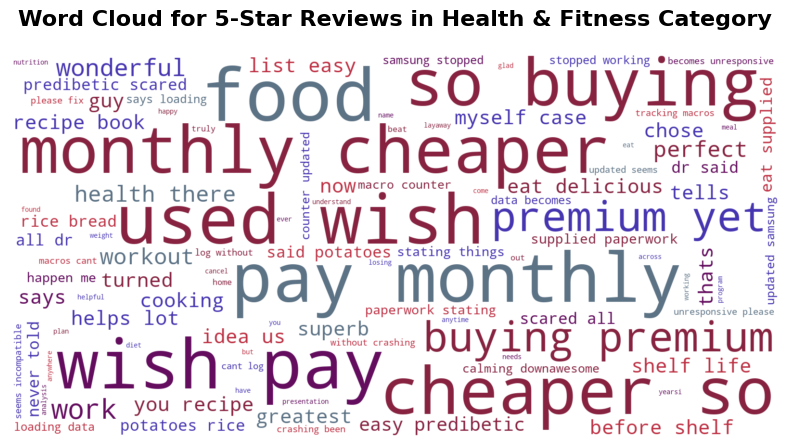


Most frequent words and their counts:
used: 26
wish: 25
pay: 25
monthly: 25
cheaper: 25
buying: 25
premium: 25
yet: 25
food: 16
foods: 12
eat: 10
updated: 8
says: 8
wonderful: 6
you: 6
said: 6
works: 6
working: 6
cant: 5
health: 5


In [26]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    color_func=health_color_func,
    min_font_size=10,
    max_font_size=150,
    random_state=42,
    collocations=True,
    normalize_plurals=True,
    margin=10,
).generate(processed_text)

# Create the plot
plt.figure(figsize=(10, 5), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')
plt.show()

# Print most common words and their frequencies
words = [word for word in processed_text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(words).most_common(20)
print("\nMost frequent words and their counts:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Using mask</font></h4>
</div>

In [27]:
mask = np.array(Image.open('../Images/man.jpg')) # Load the image as a numpy array

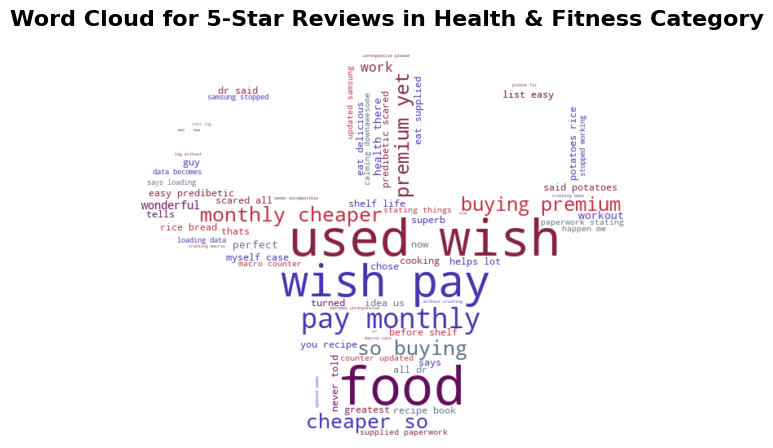

In [28]:
# Generate the word cloud with the image mask
wordcloud = WordCloud(
    width=1600, # Set the width of the canvas
    height=800, # Set the height of the canvas
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    color_func=health_color_func,# Use the custom color function
    random_state=42,
    collocations=True, # Detect bigrams or trigrams
    normalize_plurals=True, # Normalize plurals
    mask=mask # Use the image mask
).generate(processed_text)

# Create the plot
plt.figure(figsize=(10, 5), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')

# # Save with high DPI
# plt.savefig('health_fitness_wordcloud.png', 
#             dpi=300, # High DPI 
#             bbox_inches='tight', 
#             facecolor='white')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Visualize the sentiment distribution (positive, neutral, negative) of user reviews 
using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5
stars). Include only apps with more than 1,000 reviews and group by the top 5 
categories.

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Data Pre-processing</font></h4>
</div>

In [29]:
# Filter apps with more than 1,000 reviews
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')
playstore_filtered = playstore_data[playstore_data['Reviews'] > 1000]

# Get top 5 categories by number of apps
top_categories = playstore_filtered['Category'].value_counts().head(5).index
playstore_filtered = playstore_filtered[playstore_filtered['Category'].isin(top_categories)]

# Merge datasets on 'App' column
merged_data_02 = pd.merge(review_data, playstore_filtered, on='App')

# Remove rows with NaN sentiment values
merged_data_02 = merged_data_02.dropna(subset=['Sentiment'])

# Create rating groups
merged_data_02['Rating_Group'] = pd.cut(merged_data_02['Rating'], bins=[0, 2, 4, 5], labels=['1-2 stars', '3-4 stars', '4-5 stars'])

# Aggregate sentiment counts by rating group and category
sentiment_counts = merged_data_02.groupby(['Category', 'Rating_Group', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Melt the data to long format for Plotly
sentiment_melted = pd.melt(sentiment_counts, id_vars=['Category', 'Rating_Group'], var_name='Sentiment', value_name='Count')

In [30]:
# Create the Plotly stacked bar chart
fig = px.bar(sentiment_melted, x='Rating_Group', y='Count', color='Sentiment',
             facet_col='Category', barmode='stack', text='Count',
             color_discrete_map={'Positive': '#2ca02c', 'Neutral': '#ff7f0e', 'Negative': '#d62728'},
             labels={'Rating_Group': 'Rating Groups', 'Count': 'Review Count'},
             title='Sentiment Distribution by Rating Groups (Top 5 Categories)')

# Update layout for better readability
fig.update_layout(height=700, width=1000, title_x=0.5, 
                  xaxis_title='Rating Groups', yaxis_title='Review Count',
                  legend_title_text='Sentiment',
                  font=dict(size=12))

fig.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/task_03.png" alt="Description">

In [31]:
# Group by category, rating group, and sentiment to show total counts
sentiment_summary = sentiment_melted.groupby(['Category', 'Rating_Group', 'Sentiment'])['Count'].sum().reset_index()

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Justification</font></h4>
</div>

In [32]:
print(tabulate(sentiment_summary, headers='keys', tablefmt="fancy_grid")) # Display the summary table

╒════╤══════════════╤════════════════╤═════════════╤═════════╕
│    │ Category     │ Rating_Group   │ Sentiment   │   Count │
╞════╪══════════════╪════════════════╪═════════════╪═════════╡
│  0 │ FAMILY       │ 1-2 stars      │ Negative    │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  1 │ FAMILY       │ 1-2 stars      │ Neutral     │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  2 │ FAMILY       │ 1-2 stars      │ Positive    │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  3 │ FAMILY       │ 3-4 stars      │ Negative    │     120 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  4 │ FAMILY       │ 3-4 stars      │ Neutral     │      67 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  5 │ FAMILY       │ 3-4 stars      │ Positive    │     196 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  6 │ FAMILY       │ 4-5 stars      │ Negative    │   

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Create an interactive choropleth map using Plotly to visualize global installs by 
categories . Apply filters to show data for only the top 5 app categories and highlight
categories where the number of installs exceeds 1 million and App category should not
start with character “A” , “C” , “G” and “S” . this graph should work only between 
6PM IST to 8 PM IST apart from that time we should not show this graph in dashboard 
itself.

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Data Pre-processing</font></h4>
</div>

In [33]:
# Replace 'Free' with 0 and remove other non-numeric characters like "+" and ","
playstore_data['Installs'] = playstore_data['Installs'].replace('Free', '0')
playstore_data['Installs'] = playstore_data['Installs'].replace({'\+': '', ',': ''}, regex=True)

# Convert the 'Installs' column to numeric, coercing errors (e.g., invalid entries will become NaN)
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')

# Drop rows where 'Installs' is NaN
playstore_data = playstore_data.dropna(subset=['Installs'])

# Filter out categories that start with 'A', 'C', 'G', or 'S'
filtered_data = playstore_data[~playstore_data['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Filter categories with more than 1 million installs
filtered_data = filtered_data[filtered_data['Installs'] > 1000000]

# Get the top 5 categories by the number of apps
top_categories = filtered_data['Category'].value_counts().head(5).index
filtered_data = filtered_data[filtered_data['Category'].isin(top_categories)]

<div class="alert alert-block alert-danger">  
<b>Warning:</b> Since there is no country data in the dataset, we leave the map blank and indicate the issue.  
</div>

In [34]:
fig = px.choropleth(
    locations=[],  # No data for locations
    locationmode='country names',
    title="Global App Installs by Category (Country data unavailable)" # Title of the plot
)

# Update layout to show that no data is available
fig.update_layout(
    geo=dict(
        showframe=False,# Hide the frame
        showcoastlines=False,# Hide the coastlines
        projection_type='equirectangular'
    ),
    title_x=0.5,
    annotations=[
        dict(
            x=0.5, # Center the title
            y=0.5, # Center the title
            text="No country data available in the dataset.",
            showarrow=False,
            font=dict(size=20, color="red"), # Increase font size and make it red
            xref="paper", # Position the text relative to the paper
            yref="paper" # Position the text relative to the paper
        )
    ]
)

fig.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/global_installation.png" alt="Description">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Use a grouped bar chart to compare the average rating and total review count for 
the top 10 app categories by number of installs. Filter out any categories where the 
average rating is below 4.0 and size below 10 M and last update should be Jan month. 
this graph should work only between 3PM IST to 5 PM IST apart from that time we should
not show this graph in dashboard itself.

In [35]:
# Function to convert size to megabytes
def convert_size(size_str):
    if size_str == 'Varies with device': # Return NaN for 'Varies with device'
        return np.nan
    elif 'M' in size_str:
        return float(size_str.replace('M', '')) # Remove 'M' and convert to float
    elif 'k' in size_str:
        return float(size_str.replace('k', '')) / 1024  # Convert kilobytes to megabytes
    else:
        return None


<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Data Pre-processing</font></h4>
</div>

In [36]:
playstore_data['Size'] = playstore_data['Size'].apply(convert_size)

In [37]:
# Clean and Filter the data
playstore_data = playstore_data.dropna(subset=['Rating', 'Reviews', 'Installs', 'Size', 'Last Updated', 'Category']) # Drop rows with missing values
playstore_data['Installs'] = playstore_data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int) # Clean 'Installs' column
playstore_data['Size'] = playstore_data['Size'].astype(str).str.replace('M', '').astype(float) # Clean 'Size' column
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated']) # Convert 'Last Updated' to datetime

# Filter based on the given criteria
filtered_data = playstore_data[(playstore_data['Rating'] >= 4.0) &
                               (playstore_data['Size'] >= 10) &
                               (playstore_data['Last Updated'].dt.month == 1)]

# Calculate the top 10 app categories by number of installs
top_10_categories = filtered_data.groupby('Category')['Installs'].sum().nlargest(10).index
top_categories_data = filtered_data[filtered_data['Category'].isin(top_10_categories)]

# Calculate average rating and total reviews for the top 10 categories
category_metrics = top_categories_data.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'}).reset_index()

In [38]:
# Plotting Grouped Bar Chart with Secondary Y-Axis using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for total review count
fig.add_trace(
    go.Bar(name='Total Reviews', x=category_metrics['Category'], y=category_metrics['Reviews'], marker_color='orange', width=0.4, offsetgroup=1),
    secondary_y=False,
)

# Add bars for average rating
fig.add_trace(
    go.Bar(name='Average Rating', x=category_metrics['Category'], y=category_metrics['Rating'], marker_color='indigo', width=0.4, offsetgroup=2),
    secondary_y=True,
)

# Set titles and labels
fig.update_layout(
    title_text='Average Rating and Total Review Count for Top 10 App Categories by Number of Installs',
    xaxis_title='App Category',
    template='plotly_white',
    barmode='group'
)

fig.update_yaxes(title_text='Total Reviews', secondary_y=False) # Set title for primary y-axis
fig.update_yaxes(title_text='Average Rating', secondary_y=True, range=[0, 5]) # Set range for secondary y-axis

fig.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/dualaxis_01.png" alt="Description">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and content rating should be teen and app name should start with letter ‘E’ and installs should be more than 10k as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself.

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Data Pre-processing</font></h4>
</div>

In [39]:
# Convert 'Last Updated' column to datetime format
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

In [40]:
# Extract the year and month from 'Last Updated' and store it as a new column
playstore_data['Year-Month'] = playstore_data['Last Updated'].dt.to_period('M')

In [42]:
# Filter the dataset based on the given conditions:
filtered_df2 = playstore_data[
    (playstore_data['Content Rating'] == 'Teen') &  # - Content Rating should be 'Teen'
    (playstore_data['App'].str.startswith('E')) &   # - App Name should start with 'E'  
    (playstore_data['Installs'] > 10000)            # - Installs should be greater than 10,000
]

In [43]:
# Convert 'Year-Month' to string format for consistency in merging operations
filtered_df2['Year-Month'] = filtered_df2['Year-Month'].astype(str)

In [44]:
# Display the first few rows of filtered dataset
filtered_df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year-Month
1354,"Eve Period Tracker - Love, Sex & Relationships...",HEALTH_AND_FITNESS,4.6,20326.0,28.0,1000000,Free,0,Teen,Health & Fitness,2018-08-04,2.9.18,4.1 and up,2018-08
1927,Earn to Die 2,GAME,4.6,1327265.0,99.0,50000000,Free,0,Teen,Racing,2017-04-12,1.3,2.3.3 and up,2017-04
1978,Earn to Die 2,GAME,4.6,1327269.0,99.0,50000000,Free,0,Teen,Racing,2017-04-12,1.3,2.3.3 and up,2017-04
2677,EHS Dongsen Shopping,SHOPPING,3.6,3656.0,9.0,1000000,Free,0,Teen,Shopping,2018-08-03,4.16.2,4.1 and up,2018-08
2768,Etsy: Handmade & Vintage Goods,SHOPPING,4.3,95520.0,15.0,10000000,Free,0,Teen,Shopping,2018-08-03,5.3.1,4.1 and up,2018-08


In [45]:
# Get a summary of filtered dataset
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1354 to 10145
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             27 non-null     object        
 1   Category        27 non-null     object        
 2   Rating          27 non-null     float64       
 3   Reviews         27 non-null     float64       
 4   Size            27 non-null     float64       
 5   Installs        27 non-null     int64         
 6   Type            27 non-null     object        
 7   Price           27 non-null     object        
 8   Content Rating  27 non-null     object        
 9   Genres          27 non-null     object        
 10  Last Updated    27 non-null     datetime64[ns]
 11  Current Ver     27 non-null     object        
 12  Android Ver     27 non-null     object        
 13  Year-Month      27 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memor

In [46]:
# Group the filtered dataset by 'Year-Month' and 'Category' to sum total installs
install_trend = filtered_df2.groupby(['Year-Month', 'Category'], as_index=False)['Installs'].sum()

In [47]:
# Convert 'Year-Month' back to datetime format for better visualization handling
install_trend['Year-Month'] = pd.to_datetime(install_trend['Year-Month'])

In [48]:
# Create a complete date range from the minimum to the maximum 'Year-Month'
all_months = pd.date_range(start=install_trend['Year-Month'].min(), 
                           end=install_trend['Year-Month'].max(), 
                           freq='MS')  # 'MS' ensures it takes the first day of each month

In [49]:
# Get a list of all unique categories in the dataset
categories = install_trend['Category'].unique()

# Create a DataFrame with all possible combinations of categories and months
full_index = pd.MultiIndex.from_product([categories, all_months], names=['Category', 'Year-Month'])
full_df = pd.DataFrame(index=full_index).reset_index()

In [50]:
# Merge the generated date-category combinations with the original dataset (install_trend)
install_trend = pd.merge(full_df, install_trend, on=['Category', 'Year-Month'], how='left')

In [51]:
# Interpolate missing values in the 'Installs' column for each category
install_trend['Installs'] = (
    install_trend.groupby('Category', group_keys=False)['Installs']
    .apply(lambda x: x.interpolate(method='linear'))
)

In [52]:
# Apply a rolling average (3-month window) to smooth out fluctuations
install_trend['Smoothed_Installs'] = install_trend.groupby('Category')['Installs'].transform(lambda x: x.rolling(3, min_periods=1).mean())

In [53]:
# Ensure any remaining NaN values in 'Smoothed_Installs' are interpolated
install_trend['Smoothed_Installs'] = install_trend['Smoothed_Installs'].interpolate(method='linear')

In [54]:
# Apply log transformation to the installs count to reduce scale variations
install_trend['Log_Installs'] = install_trend['Installs'].replace(0, 1).apply(lambda x: np.log(x))

In [55]:
# Calculate Month-over-Month (MoM) Growth for installs
install_trend['MoM_Growth'] = install_trend.groupby('Category')['Installs'].pct_change()

# Create a boolean column to highlight months where MoM Growth is greater than 20%
install_trend['Highlight'] = install_trend['MoM_Growth'] > 0.2

In [56]:
install_trend['Installs'].fillna(0, inplace=True)  # Replace NaNs with 0

In [57]:
# Print final structure
install_trend.head()

,Category,Year-Month,Installs,Smoothed_Installs,Log_Installs,MoM_Growth,Highlight
0,GAME,2014-07-01,5.000000e+06,5.000000e+06,15.424948,NaN,False
1,GAME,2014-08-01,7.878788e+06,6.439394e+06,15.879685,0.575758,True
2,GAME,2014-09-01,1.075758e+07,7.878788e+06,16.191121,0.365385,True
3,GAME,2014-10-01,1.363636e+07,1.075758e+07,16.428251,0.267606,True
4,GAME,2014-11-01,1.651515e+07,1.363636e+07,16.619789,0.211111,True


In [59]:
# Create a line chart to visualize install trends over time
fig5 = px.line(
    install_trend, 
    x='Year-Month', # X-axis represents time in Year-Month format
    y='Smoothed_Installs', # Y-axis represents total installs
    color='Category', # Different categories are represented in different colors
    title="Install Trends for Teen-Rated Apps (Highlighting Growth > 20%)", # Chart title
    labels={'Year-Month': 'Year-Month', 'Smoothed_Installs': 'Total Installs'} # Axis labels
)
    
# Add data points and shading for periods where MoM Growth > 20%
for category in install_trend['Category'].unique():
    df_category = install_trend[install_trend['Category'] == category] # Filter data for the specific category
    df_highlight = df_category[df_category['Highlight']] # Extract rows where growth is greater than 20%

    if not df_highlight.empty:  # Only add shading if there's data to highlight
        fig5.add_trace(go.Scatter(
            x=df_highlight['Year-Month'], # X-axis: Time (Year-Month)
            y=df_highlight['Smoothed_Installs'],  # Y-axis: Install counts
            mode='lines+markers', # Show both lines and markers (data points)
            marker=dict(size=8, color='red'),  # Markers for high-growth points (red dots)
            line=dict(width=2, color='blue'), # Blue lines for high-growth periods
            fill='tozeroy', # Fill area below the line to emphasize high growth
            fillcolor='rgba(255, 0, 0, 0.5)',  # Dark red shading for high-growth areas
            name=f'High Growth - {category}' # Legend entry for high-growth categories
        ))
        
        
# Improve plot layout and styling
fig5.update_layout(
    xaxis=dict(title='Time (Year-Month)', tickangle=-45), # Label X-axis and rotate tick labels
    yaxis=dict(title='Total Installs'), # Label Y-axis
    hovermode="x unified", # Unified hover mode (shows all values at the same X point)
    template="ggplot2",  # Apply a dark theme for better contrast
    title_x=0.5,  # Center the chart title
    
)
fig5.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/task_01.png" alt="Description">